<a href="https://colab.research.google.com/github/HChandeepa/Cocochain_Optimizer/blob/Master/Coconut_Sri_Lanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# from google.colab import drive, files
# drive.mount('/content/drive')

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/coconut_supply_chain.csv')

In [69]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,supply_quantity,transport_cost_lkr_per_unit,storage_cost_lkr_per_unit,demand_forecast_units,export_quantity
0,1/15/2020,Central,Matale,Economic Centre-Dambulla,7.866079,80.651746,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,55.81,0.3077,20795,7.89,1.09,3501,139
1,1/15/2020,Central,Matale,Economic Centre-Dambulla,7.866079,80.651746,vegetables and fruits,Coconut,Unit,actual,Wholesale,LKR,50.86,0.2805,5860,8.79,2.91,4507,400
2,1/15/2020,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,62.43,0.3443,43158,2.98,1.14,7839,4655
3,1/15/2020,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,vegetables and fruits,Coconut,Unit,actual,Wholesale,LKR,52.14,0.2875,49732,9.01,2.15,8384,2979
4,2/15/2020,Central,Matale,Economic Centre-Dambulla,7.866079,80.651746,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,67.61,0.3721,16284,7.14,2.95,1694,516


In [70]:
df.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice', 'supply_quantity', 'transport_cost_lkr_per_unit',
       'storage_cost_lkr_per_unit', 'demand_forecast_units',
       'export_quantity'],
      dtype='object')

In [71]:
df.isnull().sum()

,0
date,0
province,0
district,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


In [72]:
df['pricetype'].value_counts()

,count
pricetype,
Retail,527
Wholesale,17


In [73]:
df = df[df['pricetype'] == 'Retail']
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,supply_quantity,transport_cost_lkr_per_unit,storage_cost_lkr_per_unit,demand_forecast_units,export_quantity
0,1/15/2020,Central,Matale,Economic Centre-Dambulla,7.866079,80.651746,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,55.81,0.3077,20795,7.89,1.09,3501,139
2,1/15/2020,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,62.43,0.3443,43158,2.98,1.14,7839,4655
4,2/15/2020,Central,Matale,Economic Centre-Dambulla,7.866079,80.651746,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,67.61,0.3721,16284,7.14,2.95,1694,516
6,2/15/2020,Western,Colombo,Economic Centre-Pettah,6.934423,79.853116,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,70.06,0.3856,21850,9.28,0.54,16048,9310
8,3/15/2020,Central,Matale,Economic Centre-Dambulla,7.866079,80.651746,vegetables and fruits,Coconut,Unit,actual,Retail,LKR,68.11,0.3680,26962,4.69,2.58,4846,68


In [74]:
df['pricetype'].value_counts()

,count
pricetype,
Retail,527


### Date Column format changed

In [75]:
df['date'] = pd.to_datetime(df['date'])

In [76]:
df.dtypes

,0
date,datetime64[ns]
province,object
district,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [77]:
df.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice', 'supply_quantity', 'transport_cost_lkr_per_unit',
       'storage_cost_lkr_per_unit', 'demand_forecast_units',
       'export_quantity'],
      dtype='object')

In [78]:
ffffffffff

NameError: name 'ffffffffff' is not defined

In [79]:
# Extract time features
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

### unique values in each columns

In [80]:
selected_columns = ['province','district','market','commodity','priceflag','category']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Central' 'Western' 'Eastern' 'North Central' 'North Western' 'Northern'
 'Sabaragamuwa' 'Southern' 'Uva']


Unique values in district: ['Matale' 'Colombo' 'Gampaha' 'Nuwara Eliya' 'Ampara' 'Batticaloa'
 'Anuradhapura' 'Kurunegala' 'Jaffna' 'Mannar' 'Mullattivu' 'Vavuniya'
 'Kegalle' 'Ratnapura' 'Hambantota' 'Matara' 'Badulla' 'Moneragala'
 'Kalutara' 'Trincomalee' 'Polonnaruwa' 'Puttalam' 'Kilinochchi' 'Galle'
 'Kandy']


Unique values in market: ['Economic Centre-Dambulla' 'Economic Centre-Pettah'
 'Economic Centre - Peliyagoda' 'Hanguranketha' 'Nuwara Eliya' 'Ampara'
 'Dehiattakandiya' 'Batticaloa' 'Anuradhapura' 'Galenbindunuwewa'
 'Thambuttegama' 'Kurunegala' 'Nikaweratiya' 'Jaffna' 'Mannar' 'Mullativu'
 'Vavuniya' 'Kegalle' 'Embilipitiya' 'Rathnapura' 'Tissamaharama' 'Matara'
 'Badulla' 'Bandarawela' 'Keppetipola (DEC}' 'Dammbagalla' 'Monaragala'
 'Meegoda(DEC)' 'Kalutara' 'Trincomalee' 'Polonnaruwa' 'Puttalam'
 'Kilinochchi' 'Galle' 'Hambantota' 'Kand

### Encoding Using Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['province', 'district', 'market','category','commodity','unit','priceflag','pricetype','currency']

# Apply LabelEncoder to each column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,...,price,usdprice,supply_quantity,transport_cost_lkr_per_unit,storage_cost_lkr_per_unit,demand_forecast_units,export_quantity,month,year,day
0,2020-01-15,0,15,9,7.866079,80.651746,0,0,0,0,...,55.81,0.3077,20795,7.89,1.09,3501,139,1,2020,15
2,2020-01-15,8,4,10,6.934423,79.853116,0,0,0,0,...,62.43,0.3443,43158,2.98,1.14,7839,4655,1,2020,15
4,2020-02-15,0,15,9,7.866079,80.651746,0,0,0,0,...,67.61,0.3721,16284,7.14,2.95,1694,516,2,2020,15
6,2020-02-15,8,4,10,6.934423,79.853116,0,0,0,0,...,70.06,0.3856,21850,9.28,0.54,16048,9310,2,2020,15
8,2020-03-15,0,15,9,7.866079,80.651746,0,0,0,0,...,68.11,0.3680,26962,4.69,2.58,4846,68,3,2020,15


### Heat map to identify correlation coefficient

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

price                          1.000000
usdprice                       0.921463
date                           0.481982
year                           0.393641
month                          0.278504
province                       0.260100
demand_forecast_units          0.202723
supply_quantity                0.151383
export_quantity                0.073227
storage_cost_lkr_per_unit      0.026476
market                         0.019876
district                      -0.040219
transport_cost_lkr_per_unit   -0.050725
longitude                     -0.081666
latitude                      -0.407646
category                            NaN
commodity                           NaN
unit                                NaN
priceflag                           NaN
pricetype                           NaN
currency                            NaN
day                                 NaN
Name: price, dtype: float64


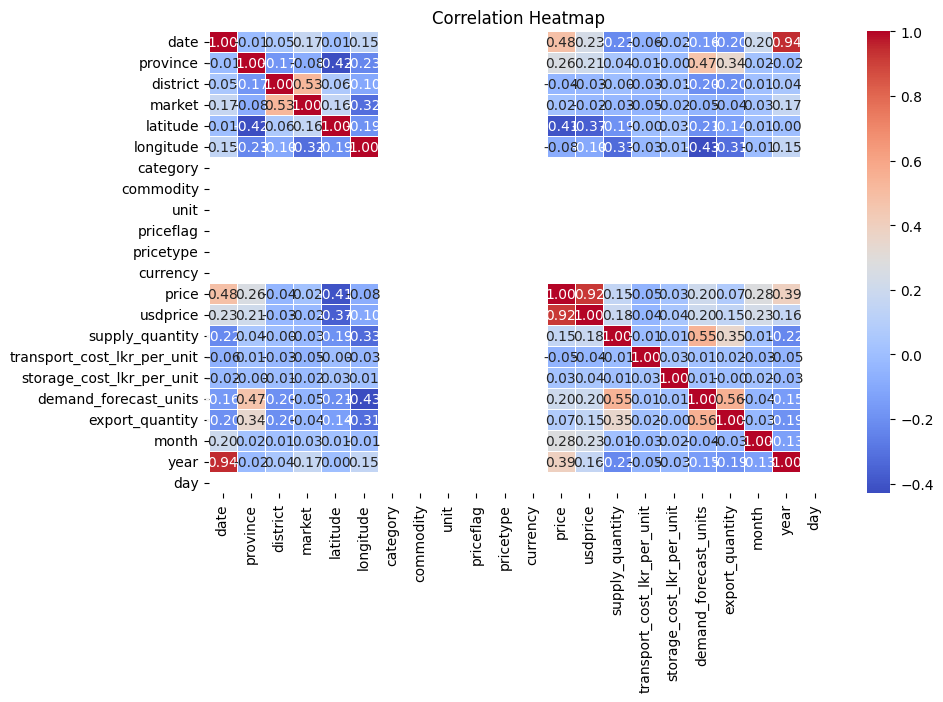

In [83]:
correlation_matrix = df.corr()
print(correlation_matrix["price"].sort_values(ascending=False))
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Retail Price Prediction Model (Linear Regression / XGBoost)

In [84]:
# Selected features for the model developmet
selected_features = [
    'year',
    'month',
    'day',
    'province',
    'district',
    'market'
]

In [85]:
X = df[selected_features]  # Features (predictors)
y = df['price']  # Target variable

# Split the data into training and test sets (80:20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model

In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Take the square root of MSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Linear Regression RMSE: 18.68
Linear Regression MAE: 14.78
Linear Regression R²: 0.39


### XGBoost (Extreme Gradient Boosting)

In [87]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train an XGBoost model with specific hyperparameters
model_xgb = XGBRegressor(
    random_state=49,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")

XGBoost RMSE: 6.96
XGBoost MAE: 5.27
XGBoost R²: 0.91


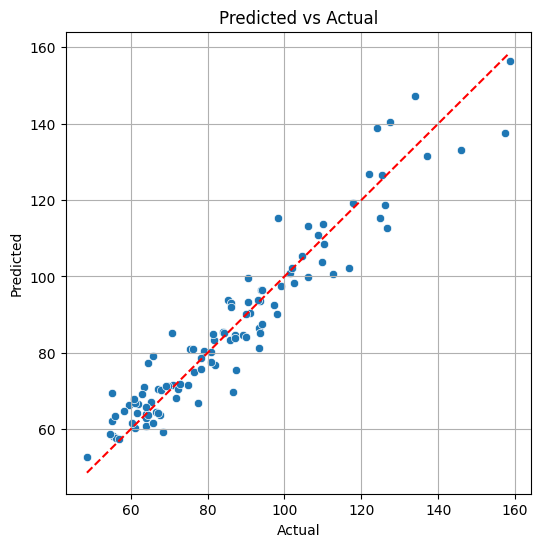

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()

In [89]:
import pickle

# Save the XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

## Supply Forecasting Model

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
# Assume df is already loaded and date is datetime64
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofweek'] = df['date'].dt.dayofweek
df['day'] = df['date'].dt.day

In [100]:
categorical_cols = ['province', 'district', 'market', 'pricetype']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [101]:
X = df_encoded.drop(['date', 'category', 'commodity', 'unit', 'priceflag', 'currency', 'supply_quantity'], axis=1)
y = df_encoded['supply_quantity']

In [102]:
df_encoded = df_encoded.sort_values('date')
split_index = int(0.8 * len(df_encoded))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [103]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 3581.41
RMSE: 7039.88


In [106]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'supply_forecasting_model.pkl')

['supply_forecasting_model.pkl']